<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/LSTM_GRU_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import urllib.request, json
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM ,Bidirectional ,GRU 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *

In [ ]:
def DataSetDownload(tickername):

    api_key = '3E5HKPZJUKXG2X6L'

    
    ticker = tickername

    # JSON file with all the stock market data for AAL from the last 20 years
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

    # Save data to this file
    file_to_save = 'stock_market_data-%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
    
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df = df.to_csv(file_to_save)
        return df

    # If the data is already there, just load it from the CSV
    else:
        print('File already exists. Loading data from CSV')
        df =  pd.read_csv(file_to_save)
        return df



In [ ]:
AALdf = DataSetDownload("AAL")

File already exists. Loading data from CSV


In [ ]:
AALdf = AALdf.sort_values('Date')
# Double check the result
AALdf['Year'] = pd.DatetimeIndex(AALdf['Date']).year
AALdf['Month'] = pd.DatetimeIndex(AALdf['Date']).month
AALdf['Day'] = pd.DatetimeIndex(AALdf['Date']).day
AALdf.drop(columns=AALdf.columns[0],  axis=1,  inplace=True)

print(AALdf.head())
print(AALdf.shape)

            Date    Low   High  Close   Open  Year  Month  Day
4066  2005-09-27  19.10  21.40  19.30  21.05  2005      9   27
4065  2005-09-28  19.20  20.53  20.50  19.30  2005      9   28
4064  2005-09-29  20.10  20.58  20.21  20.40  2005      9   29
4063  2005-09-30  20.18  21.05  21.01  20.26  2005      9   30
4062  2005-10-03  20.90  21.75  21.50  20.90  2005     10    3
(4067, 8)


In [ ]:
TSLAdf = DataSetDownload("TSLA")

File already exists. Loading data from CSV


In [ ]:
TSLAdf = TSLAdf.sort_values('Date')
# Double check the result
TSLAdf['Year'] = pd.DatetimeIndex(TSLAdf['Date']).year
TSLAdf['Month'] = pd.DatetimeIndex(TSLAdf['Date']).month
TSLAdf['Day'] = pd.DatetimeIndex(TSLAdf['Date']).day
TSLAdf.drop(columns=TSLAdf.columns[0],  axis=1,  inplace=True)

print(TSLAdf.head())
print(TSLAdf.shape)

            Date    Low     High  Close   Open  Year  Month  Day
2870  2010-06-29  17.54  25.0000  23.89  19.00  2010      6   29
2869  2010-06-30  23.30  30.4192  23.83  25.79  2010      6   30
2868  2010-07-01  20.27  25.9200  21.96  25.00  2010      7    1
2867  2010-07-02  18.71  23.1000  19.20  23.00  2010      7    2
2866  2010-07-06  15.83  20.0000  16.11  20.00  2010      7    6
(2871, 8)


In [ ]:
NYCdf = DataSetDownload("NYC")

File already exists. Loading data from CSV


In [ ]:
NYCdf = NYCdf.sort_values('Date')
# Double check the result

NYCdf['Year'] = pd.DatetimeIndex(NYCdf['Date']).year
NYCdf['Month'] = pd.DatetimeIndex(NYCdf['Date']).month
NYCdf['Day'] = pd.DatetimeIndex(NYCdf['Date']).day
NYCdf.drop(columns=NYCdf.columns[0],  axis=1,  inplace=True)

print(NYCdf.head())
print(NYCdf.shape)

           Date    Low     High    Close   Open  Year  Month  Day
318  2020-08-18  15.50  30.0000  17.6000  30.00  2020      8   18
317  2020-08-19  13.38  17.6000  14.4791  16.35  2020      8   19
316  2020-08-20  14.08  14.9500  14.7500  14.95  2020      8   20
315  2020-08-21  13.25  14.5004  13.8300  14.39  2020      8   21
314  2020-08-24  13.51  14.0499  13.7900  13.76  2020      8   24
(319, 8)


## AAL

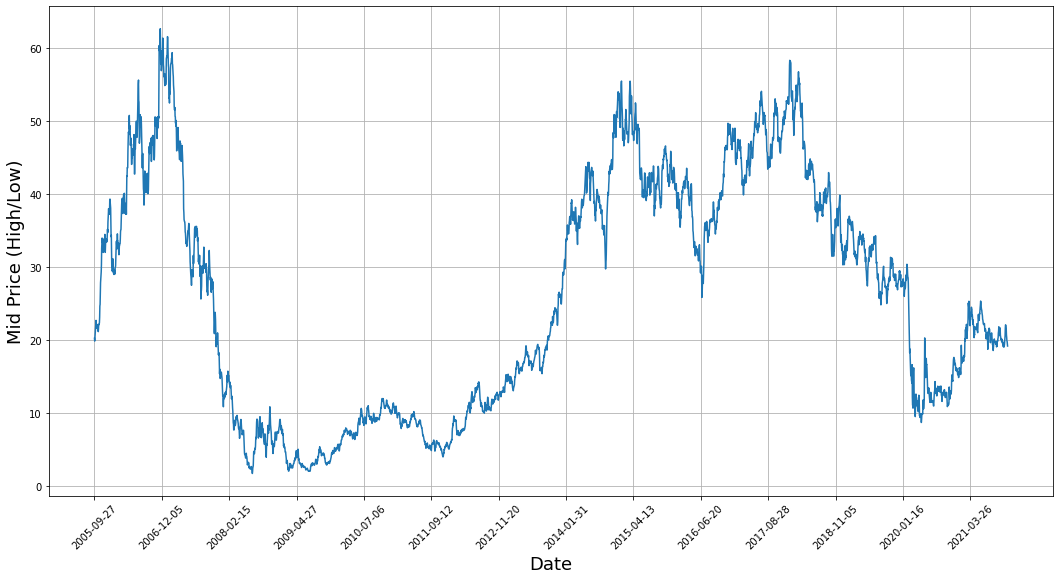

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(AALdf.shape[0]),(AALdf['Low']+AALdf['High'])/2.0)
plt.xticks(range(0,AALdf.shape[0],300),AALdf['Date'].loc[::300],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price (High/Low)',fontsize=18)
plt.grid(True)
plt.show()


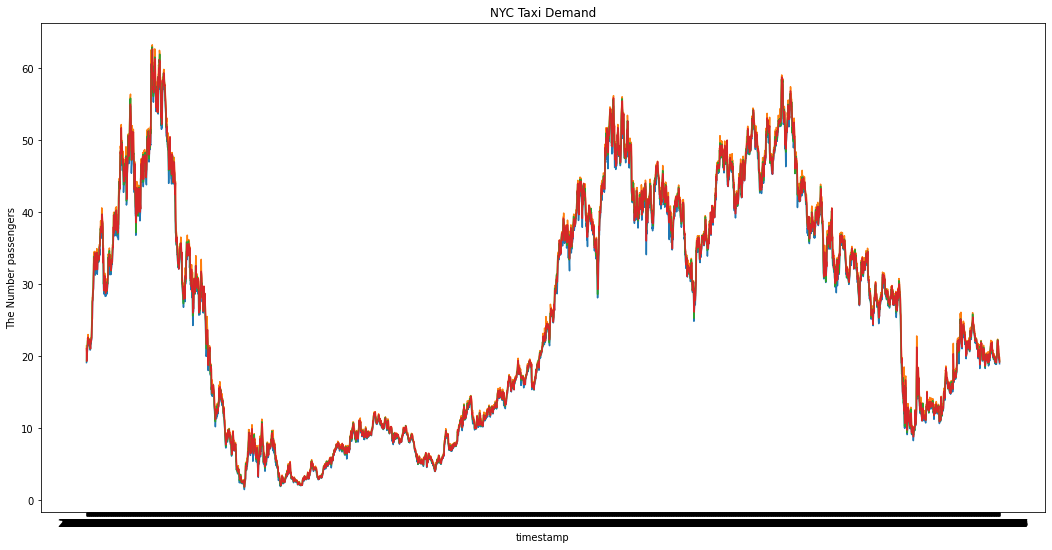

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(AALdf.iloc[0:]['Date'], AALdf.iloc[0:]['Low'])
ax.plot(AALdf.iloc[0:]['Date'], AALdf.iloc[0:]['High'])
ax.plot(AALdf.iloc[0:]['Date'], AALdf.iloc[0:]['Close'])
ax.plot(AALdf.iloc[0:]['Date'], AALdf.iloc[0:]['Open'])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('The Number passengers')
plt.show()

In [ ]:
training_set = AALdf.iloc[:800, 4:5].values
test_set = AALdf.iloc[800:, 4:5].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled[60,0]

0.5513220561668584

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
modelLSTM = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 15 , return_sequences = True, input_shape = (X_train.shape[1], 1)))
modelLSTM.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 15, return_sequences = True))
modelLSTM.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 15, return_sequences = True))
modelLSTM.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelLSTM.add(LSTM(units = 15))
modelLSTM.add(Dropout(0.2))

# Adding the output layer
modelLSTM.add(Dense(units = 1))

# Compiling the RNN
modelLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelLSTM.fit(X_train, y_train, epochs = 100, batch_size = 16)

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = AALdf.iloc[:800, 4:5]
dataset_test = AALdf.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 3266):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(3206, 60, 1)


In [ ]:
predicted_stock_price = modelLSTM.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

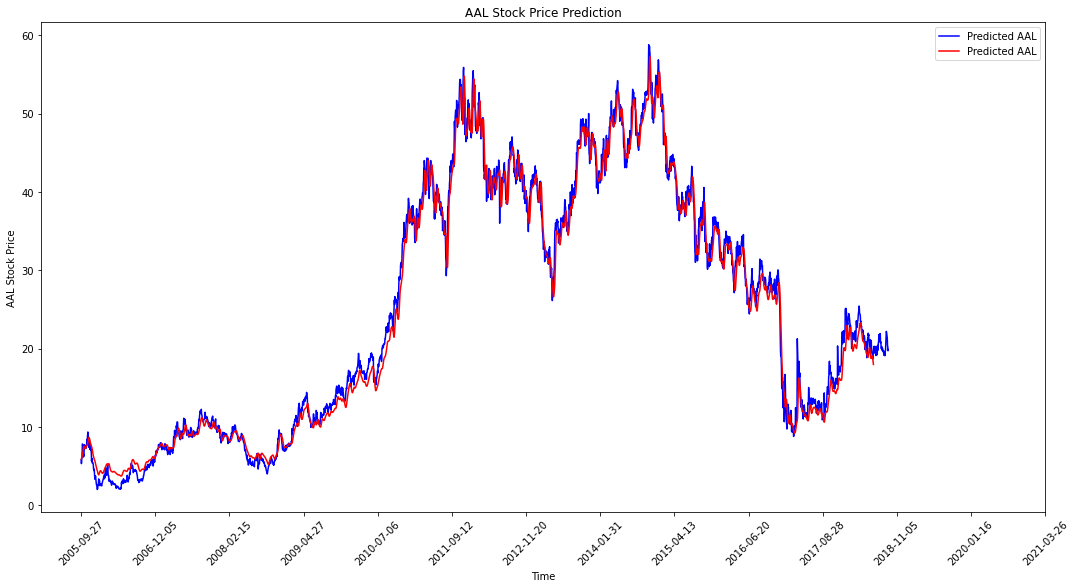

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(AALdf.head(3266).Date,dataset_test.head(3266), color = 'blue', label = 'Predicted AAL')
plt.plot(AALdf.head(3206).Date,predicted_stock_price, color = 'Red', label = 'Predicted AAL')
plt.xticks(range(0,AALdf.shape[0],300),AALdf['Date'].loc[::300],rotation=45)
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()

In [ ]:
modelBidirectional = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 15 , return_sequences = True, input_shape = (X_train.shape[1], 1))))
modelBidirectional.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 15, return_sequences = True)))
modelBidirectional.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 15, return_sequences = True)))
modelBidirectional.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 15)))
modelBidirectional.add(Dropout(0.2))

# Adding the output layer
modelBidirectional.add(Dense(units = 1))

# Compiling the RNN
modelBidirectional.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelBidirectional.fit(X_train, y_train, epochs = 100, batch_size = 16)

In [ ]:
predicted_stock_price = modelBidirectional.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

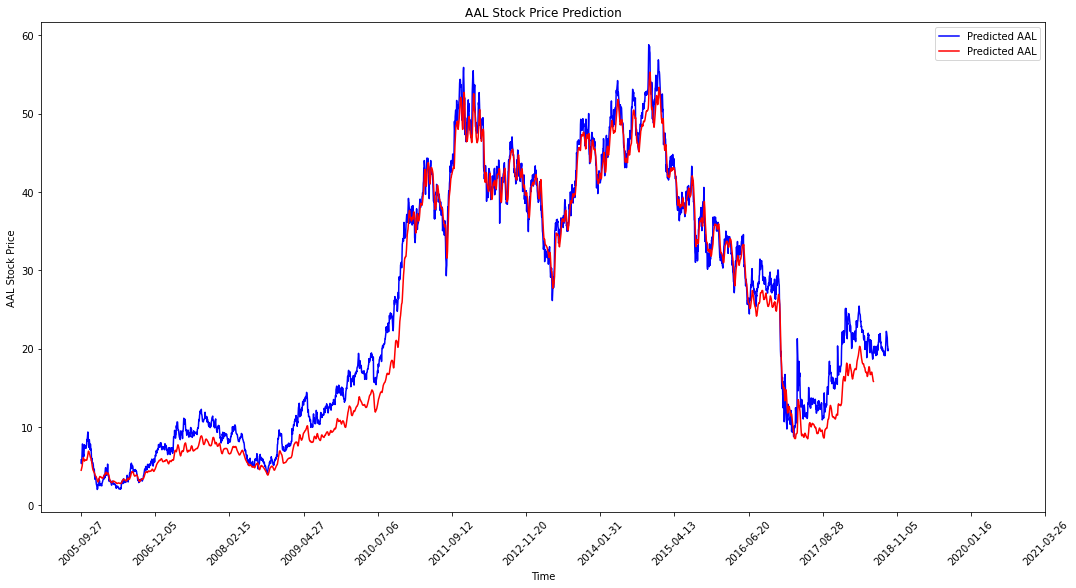

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(AALdf.head(3266).Date,dataset_test.head(3266), color = 'blue', label = 'Predicted AAL')
plt.plot(AALdf.head(3206).Date,predicted_stock_price, color = 'Red', label = 'Predicted AAL')
plt.xticks(range(0,AALdf.shape[0],300),AALdf['Date'].loc[::300],rotation=45)
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()

In [ ]:
modelGRU = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 15 , return_sequences = True, input_shape = (X_train.shape[1], 1))))
modelGRU.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 15, return_sequences = True)))
modelGRU.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 15, return_sequences = True)))
modelGRU.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 15)))
modelGRU.add(Dropout(0.2))

# Adding the output layer
modelGRU.add(Dense(units = 1))

# Compiling the RNN
modelGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelGRU.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
47/47 [==============================] - 24s 147ms/step - loss: 0.0304
Epoch 2/100
47/47 [==============================] - 7s 146ms/step - loss: 0.0115
Epoch 3/100
47/47 [==============================] - 7s 150ms/step - loss: 0.0091
Epoch 4/100
47/47 [==============================] - 7s 151ms/step - loss: 0.0085
Epoch 5/100
47/47 [==============================] - 7s 146ms/step - loss: 0.0085
Epoch 6/100
47/47 [==============================] - 7s 148ms/step - loss: 0.0068
Epoch 7/100
47/47 [==============================] - 7s 147ms/step - loss: 0.0063
Epoch 8/100
47/47 [==============================] - 7s 148ms/step - loss: 0.0068
Epoch 9/100
47/47 [==============================] - 7s 151ms/step - loss: 0.0062
Epoch 10/100
47/47 [==============================] - 7s 148ms/step - loss: 0.0058
Epoch 11/100
47/47 [==============================] - 7s 147ms/step - loss: 0.0062
Epoch 12/100
47/47 [==============================] - 7s 149ms/step - loss: 0.0056
Epoch 13/100

In [ ]:
predicted_stock_price = modelGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

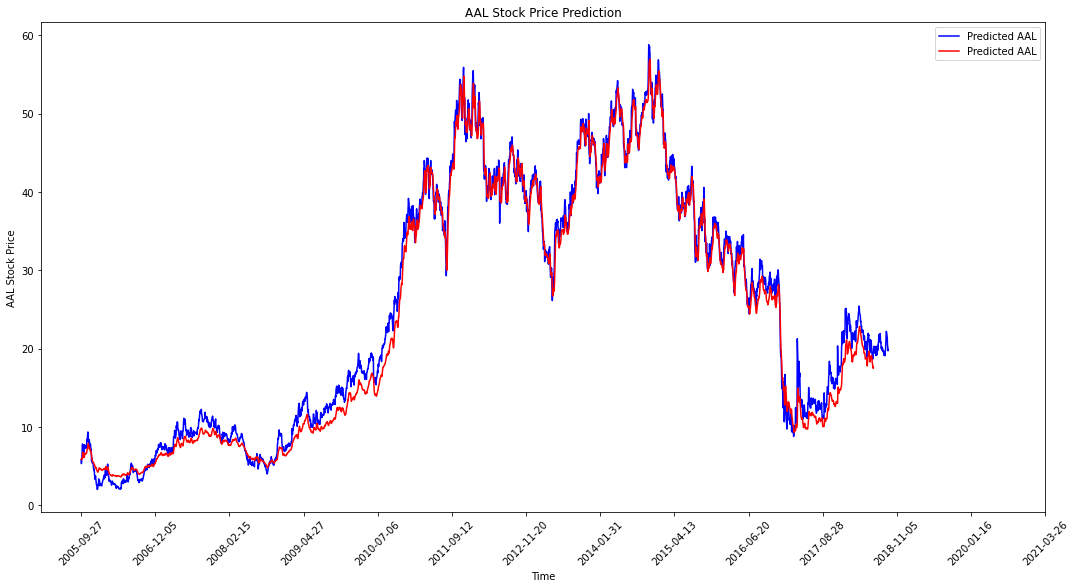

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(AALdf.head(3266).Date,dataset_test.head(3266), color = 'blue', label = 'Predicted AAL')
plt.plot(AALdf.head(3206).Date,predicted_stock_price, color = 'Red', label = 'Predicted AAL')
plt.xticks(range(0,AALdf.shape[0],300),AALdf['Date'].loc[::300],rotation=45)
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()

## NYC

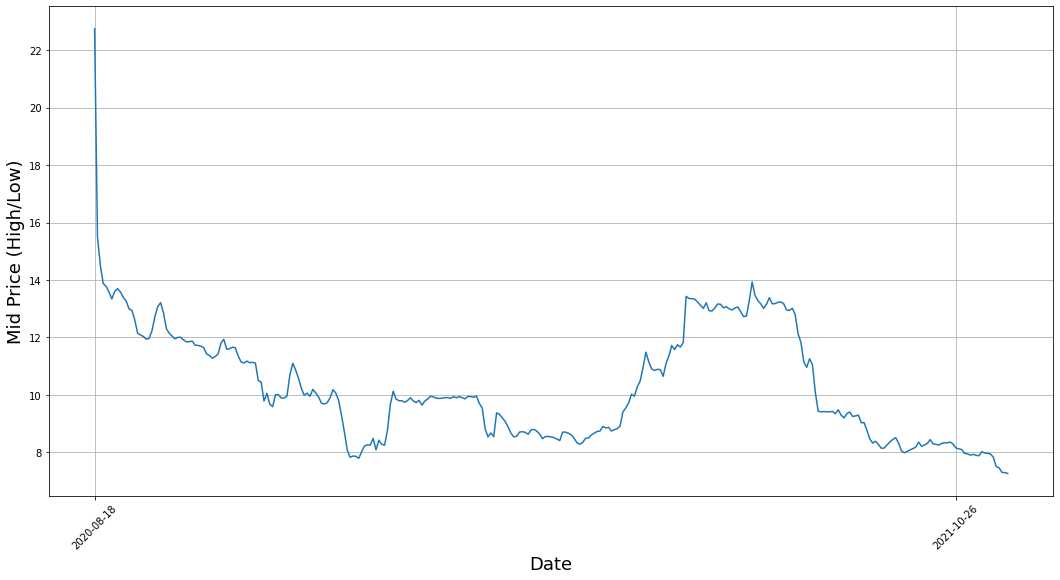

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(NYCdf.shape[0]),(NYCdf['Low']+NYCdf['High'])/2.0)
plt.xticks(range(0,NYCdf.shape[0],300),NYCdf['Date'].loc[::300],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price (High/Low)',fontsize=18)
plt.grid(True)
plt.show()


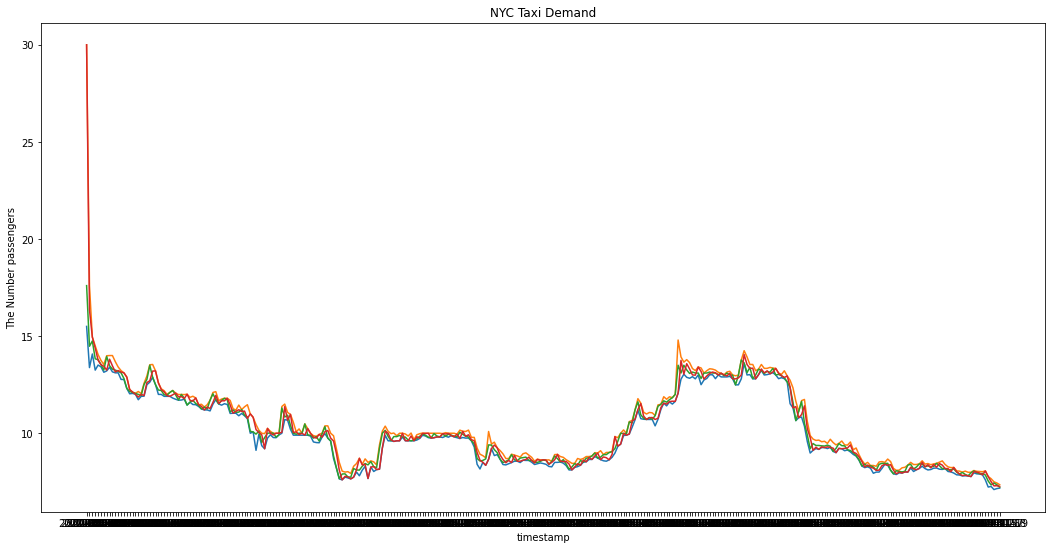

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(NYCdf.iloc[0:]['Date'], NYCdf.iloc[0:]['Low'])
ax.plot(NYCdf.iloc[0:]['Date'], NYCdf.iloc[0:]['High'])
ax.plot(NYCdf.iloc[0:]['Date'], NYCdf.iloc[0:]['Close'])
ax.plot(NYCdf.iloc[0:]['Date'], NYCdf.iloc[0:]['Open'])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('The Number passengers')
plt.show()

In [ ]:
training_set = NYCdf.iloc[:800, 4:5].values
test_set = NYCdf.iloc[800:, 4:5].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled[60,0]

0.12225153913808262

In [ ]:
X_train = []
y_train = []

for i in range(60, 319):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
modelLSTMNYC = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelLSTMNYC.add(LSTM(units = 15 , return_sequences = True, input_shape = (X_train.shape[1], 1)))
modelLSTMNYC.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelLSTMNYC.add(LSTM(units = 15, return_sequences = True))
modelLSTMNYC.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelLSTMNYC.add(LSTM(units = 15, return_sequences = True))
modelLSTMNYC.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelLSTMNYC.add(LSTM(units = 15))
modelLSTMNYC.add(Dropout(0.2))

# Adding the output layer
modelLSTMNYC.add(Dense(units = 1))

# Compiling the RNN
modelLSTMNYC.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelLSTMNYC.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
17/17 [==============================] - 8s 82ms/step - loss: 0.0078
Epoch 2/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0050
Epoch 3/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0035
Epoch 4/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0032
Epoch 5/30
17/17 [==============================] - 1s 78ms/step - loss: 0.0029
Epoch 6/30
17/17 [==============================] - 1s 76ms/step - loss: 0.0024
Epoch 7/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0023
Epoch 8/30
17/17 [==============================] - 1s 78ms/step - loss: 0.0019
Epoch 9/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0020
Epoch 10/30
17/17 [==============================] - 1s 76ms/step - loss: 0.0020
Epoch 11/30
17/17 [==============================] - 1s 76ms/step - loss: 0.0020
Epoch 12/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0019
Epoch 13/30
17/17 [==================

In [ ]:
dataset_train = NYCdf.iloc[:200, 4:5]
dataset_test = NYCdf.iloc[100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 200):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(140, 60, 1)


In [ ]:
predicted_stock_price = modelLSTMNYC.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

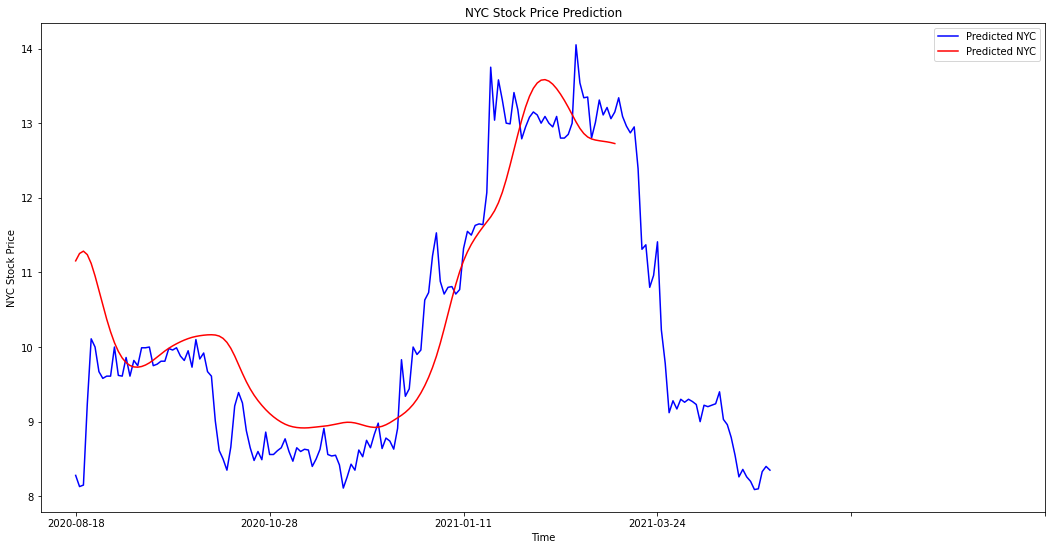

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(NYCdf.head(180).Date,dataset_test.head(180), color = 'blue', label = 'Predicted NYC')
plt.plot(NYCdf.head(140).Date,predicted_stock_price, color = 'Red', label = 'Predicted NYC')
plt.xticks(np.arange(0,300,50))
plt.title('NYC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NYC Stock Price')
plt.legend()
plt.show()

In [ ]:
modelBidirectionalNYC = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelBidirectionalNYC.add(Bidirectional(LSTM(units = 15 , return_sequences = True, input_shape = (X_train.shape[1], 1))))
modelBidirectionalNYC.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelBidirectionalNYC.add(Bidirectional(LSTM(units = 15, return_sequences = True)))
modelBidirectionalNYC.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelBidirectionalNYC.add(Bidirectional(LSTM(units = 15, return_sequences = True)))
modelBidirectionalNYC.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelBidirectionalNYC.add(Bidirectional(LSTM(units = 15)))
modelBidirectionalNYC.add(Dropout(0.2))

# Adding the output layer
modelBidirectionalNYC.add(Dense(units = 1))

# Compiling the RNN
modelBidirectionalNYC.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelBidirectionalNYC.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
17/17 [==============================] - 17s 112ms/step - loss: 0.0063
Epoch 2/30
17/17 [==============================] - 2s 109ms/step - loss: 0.0037
Epoch 3/30
17/17 [==============================] - 2s 126ms/step - loss: 0.0021
Epoch 4/30
17/17 [==============================] - 2s 109ms/step - loss: 0.0016
Epoch 5/30
17/17 [==============================] - 2s 109ms/step - loss: 0.0014
Epoch 6/30
17/17 [==============================] - 2s 111ms/step - loss: 0.0014
Epoch 7/30
17/17 [==============================] - 2s 112ms/step - loss: 0.0011
Epoch 8/30
17/17 [==============================] - 2s 110ms/step - loss: 9.9201e-04
Epoch 9/30
17/17 [==============================] - 2s 121ms/step - loss: 0.0011
Epoch 10/30
17/17 [==============================] - 2s 111ms/step - loss: 0.0011
Epoch 11/30
17/17 [==============================] - 2s 116ms/step - loss: 9.9644e-04
Epoch 12/30
17/17 [==============================] - 2s 114ms/step - loss: 9.7028e-04
Epoch 13/30


In [ ]:
predicted_stock_price = modelBidirectionalNYC.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

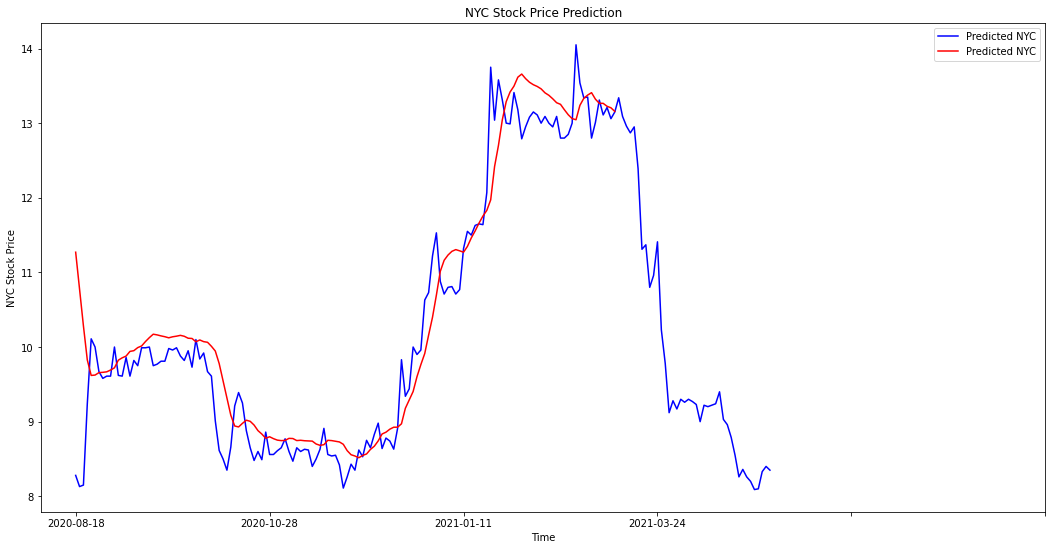

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(NYCdf.head(180).Date,dataset_test.head(180), color = 'blue', label = 'Predicted NYC')
plt.plot(NYCdf.head(140).Date,predicted_stock_price, color = 'Red', label = 'Predicted NYC')
plt.xticks(np.arange(0,300,50))
plt.title('NYC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NYC Stock Price')
plt.legend()
plt.show()

In [ ]:
modelGRUNYC = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelGRUNYC.add(Bidirectional(GRU (units = 15 , return_sequences = True, input_shape = (X_train.shape[1], 1))))
modelGRUNYC.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelGRUNYC.add(Bidirectional(GRU (units = 15, return_sequences = True)))
modelGRUNYC.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelGRUNYC.add(Bidirectional(GRU (units = 15, return_sequences = True)))
modelGRUNYC.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelGRUNYC.add(Bidirectional(GRU (units = 15)))
modelGRUNYC.add(Dropout(0.2))

# Adding the output layer
modelGRUNYC.add(Dense(units = 1))

# Compiling the RNN
modelGRUNYC.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelGRUNYC.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
17/17 [==============================] - 18s 126ms/step - loss: 0.0082
Epoch 2/30
17/17 [==============================] - 2s 132ms/step - loss: 0.0032
Epoch 3/30
17/17 [==============================] - 2s 131ms/step - loss: 0.0016
Epoch 4/30
17/17 [==============================] - 2s 128ms/step - loss: 0.0012
Epoch 5/30
17/17 [==============================] - 2s 129ms/step - loss: 0.0011
Epoch 6/30
17/17 [==============================] - 2s 130ms/step - loss: 0.0011
Epoch 7/30
17/17 [==============================] - 2s 132ms/step - loss: 0.0011
Epoch 8/30
17/17 [==============================] - 2s 131ms/step - loss: 9.9407e-04
Epoch 9/30
17/17 [==============================] - 2s 131ms/step - loss: 0.0011
Epoch 10/30
17/17 [==============================] - 2s 142ms/step - loss: 0.0010
Epoch 11/30
17/17 [==============================] - 3s 153ms/step - loss: 0.0010
Epoch 12/30
17/17 [==============================] - 2s 129ms/step - loss: 9.3266e-04
Epoch 13/30
17/1

In [ ]:
predicted_stock_price = modelGRUNYC.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

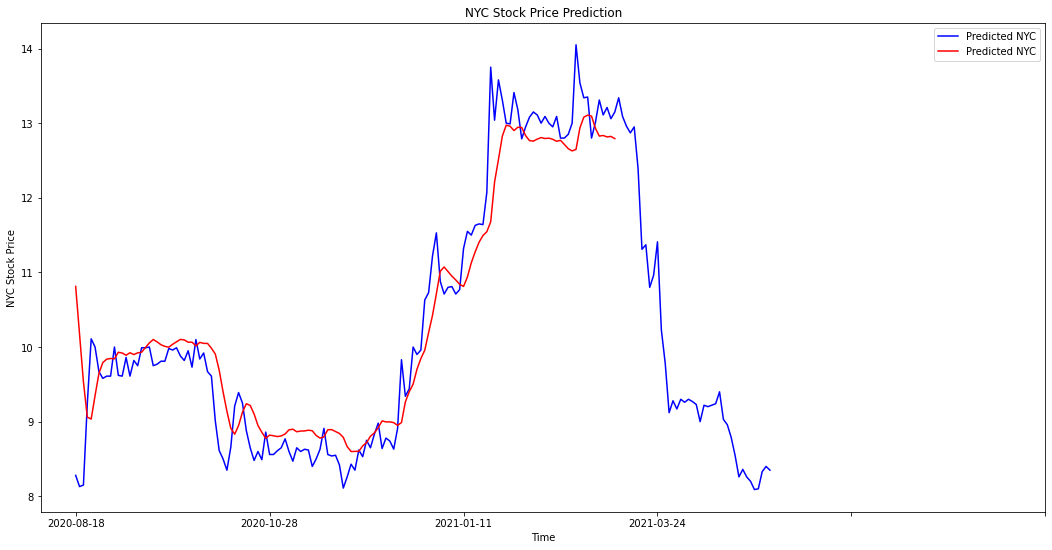

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(NYCdf.head(180).Date,dataset_test.head(180), color = 'blue', label = 'Predicted NYC')
plt.plot(NYCdf.head(140).Date,predicted_stock_price, color = 'Red', label = 'Predicted NYC')
plt.xticks(np.arange(0,300,50))
plt.title('NYC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NYC Stock Price')
plt.legend()
plt.show()

## TSLA

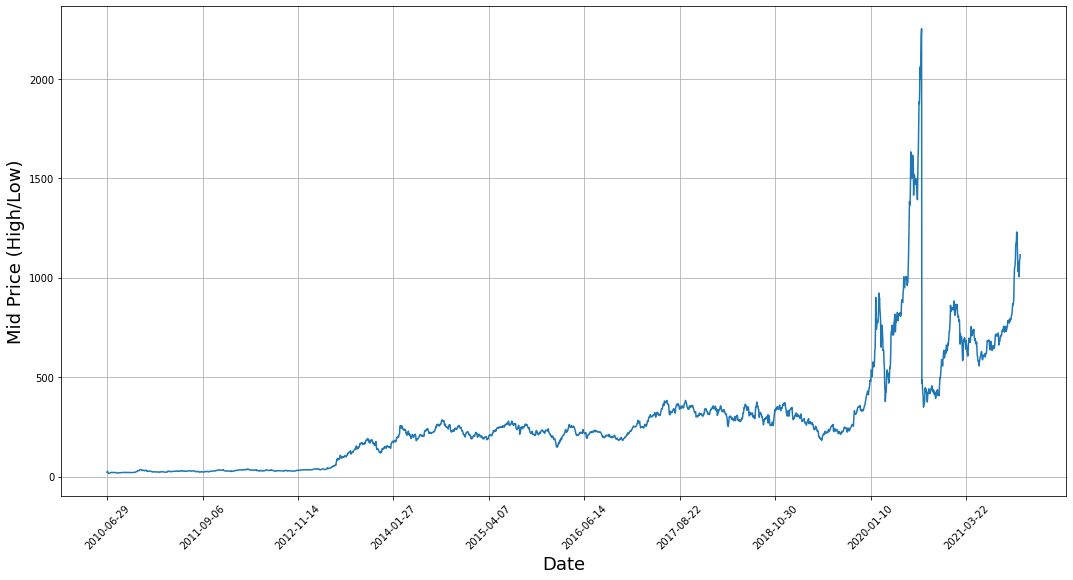

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(TSLAdf.shape[0]),(TSLAdf['Low']+TSLAdf['High'])/2.0)
plt.xticks(range(0,TSLAdf.shape[0],300),TSLAdf['Date'].loc[::300],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price (High/Low)',fontsize=18)
plt.grid(True)
plt.show()


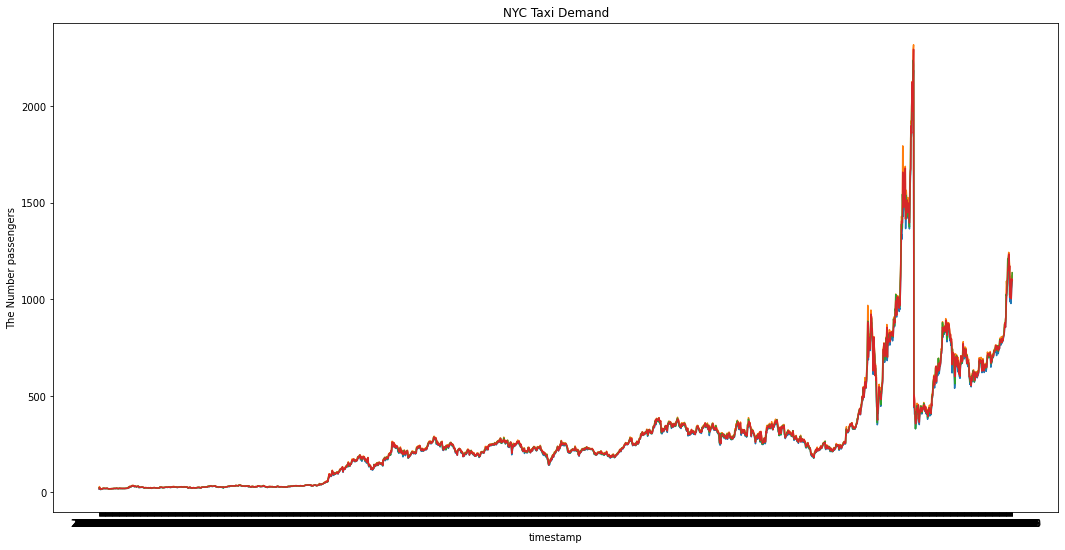

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(TSLAdf.iloc[0:]['Date'], TSLAdf.iloc[0:]['Low'])
ax.plot(TSLAdf.iloc[0:]['Date'], TSLAdf.iloc[0:]['High'])
ax.plot(TSLAdf.iloc[0:]['Date'], TSLAdf.iloc[0:]['Close'])
ax.plot(TSLAdf.iloc[0:]['Date'], TSLAdf.iloc[0:]['Open'])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('The Number passengers')
plt.show()

In [ ]:
training_set = TSLAdf.iloc[:800, 4:5].values
test_set = TSLAdf.iloc[800:, 4:5].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled[60,0]

0.02452262620978289

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
modelLSTMTSLA = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelLSTMTSLA.add(LSTM(units = 70 , return_sequences = True, input_shape = (X_train.shape[1], 1)))
modelLSTMTSLA.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelLSTMTSLA.add(LSTM(units = 70, return_sequences = True))
modelLSTMTSLA.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelLSTMTSLA.add(LSTM(units = 70, return_sequences = True))
modelLSTMTSLA.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelLSTMTSLA.add(LSTM(units = 70))
modelLSTMTSLA.add(Dropout(0.2))

# Adding the output layer
modelLSTMTSLA.add(Dense(units = 1))

# Compiling the RNN
modelLSTMTSLA.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelLSTMTSLA.fit(X_train, y_train, epochs = 20, batch_size = 8)

Epoch 1/20
93/93 [==============================] - 17s 100ms/step - loss: 0.0063
Epoch 2/20
93/93 [==============================] - 9s 102ms/step - loss: 0.0028
Epoch 3/20
93/93 [==============================] - 9s 100ms/step - loss: 0.0025
Epoch 4/20
93/93 [==============================] - 9s 102ms/step - loss: 0.0020
Epoch 5/20
93/93 [==============================] - 9s 102ms/step - loss: 0.0018
Epoch 6/20
93/93 [==============================] - 9s 101ms/step - loss: 0.0019
Epoch 7/20
93/93 [==============================] - 9s 101ms/step - loss: 0.0021
Epoch 8/20
93/93 [==============================] - 10s 103ms/step - loss: 0.0022
Epoch 9/20
93/93 [==============================] - 9s 102ms/step - loss: 0.0019
Epoch 10/20
93/93 [==============================] - 9s 102ms/step - loss: 0.0016
Epoch 11/20
93/93 [==============================] - 9s 101ms/step - loss: 0.0015
Epoch 12/20
93/93 [==============================] - 9s 101ms/step - loss: 0.0012
Epoch 13/20
93/93 [====

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = TSLAdf.iloc[:800, 4:5]
dataset_test = TSLAdf.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 900):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(840, 60, 1)


In [ ]:
predicted_stock_price = modelLSTMTSLA.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

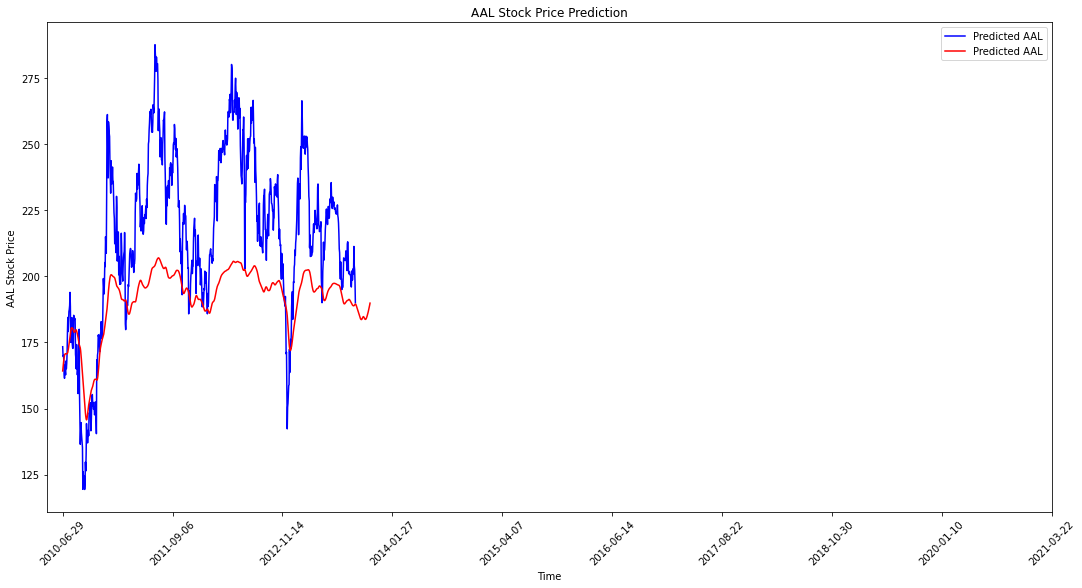

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(TSLAdf.head(800).Date,dataset_test.head(800), color = 'blue', label = 'Predicted AAL')
plt.plot(TSLAdf.head(840).Date,predicted_stock_price, color = 'Red', label = 'Predicted AAL')
plt.xticks(range(0,TSLAdf.shape[0],300),TSLAdf['Date'].loc[::300],rotation=45)
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()

In [ ]:
modelBidirectional = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1], 1))))
modelBidirectional.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
modelBidirectional.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
modelBidirectional.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelBidirectional.add(Bidirectional(LSTM(units = 50)))
modelBidirectional.add(Dropout(0.2))

# Adding the output layer
modelBidirectional.add(Dense(units = 1))

# Compiling the RNN
modelBidirectional.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelBidirectional.fit(X_train, y_train, epochs = 20, batch_size = 8)

Epoch 1/20
93/93 [==============================] - 29s 149ms/step - loss: 0.0040
Epoch 2/20
93/93 [==============================] - 14s 149ms/step - loss: 0.0020
Epoch 3/20
93/93 [==============================] - 14s 156ms/step - loss: 0.0021
Epoch 4/20
93/93 [==============================] - 14s 149ms/step - loss: 0.0024
Epoch 5/20
93/93 [==============================] - 14s 148ms/step - loss: 0.0018
Epoch 6/20
93/93 [==============================] - 14s 148ms/step - loss: 0.0017
Epoch 7/20
93/93 [==============================] - 14s 149ms/step - loss: 0.0013
Epoch 8/20
93/93 [==============================] - 14s 150ms/step - loss: 0.0011
Epoch 9/20
93/93 [==============================] - 14s 148ms/step - loss: 0.0019
Epoch 10/20
93/93 [==============================] - 14s 149ms/step - loss: 0.0014
Epoch 11/20
93/93 [==============================] - 14s 151ms/step - loss: 0.0011
Epoch 12/20
93/93 [==============================] - 14s 149ms/step - loss: 0.0015
Epoch 13/20
9

In [ ]:
predicted_stock_price = modelBidirectional.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

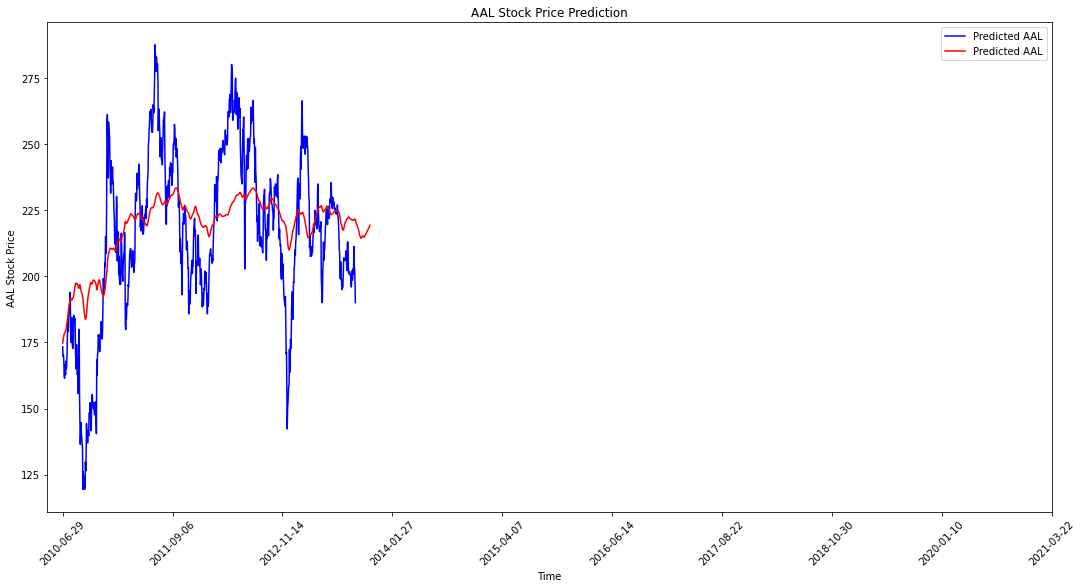

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(TSLAdf.head(800).Date,dataset_test.head(800), color = 'blue', label = 'Predicted AAL')
plt.plot(TSLAdf.head(840).Date,predicted_stock_price, color = 'Red', label = 'Predicted AAL')
plt.xticks(range(0,TSLAdf.shape[0],300),TSLAdf['Date'].loc[::300],rotation=45)
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()

In [ ]:
modelGRU = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 50 , return_sequences = True, input_shape = (X_train.shape[1], 1))))
modelGRU.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 50, return_sequences = True)))
modelGRU.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 50, return_sequences = True)))
modelGRU.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
modelGRU.add(Bidirectional(GRU (units = 50)))
modelGRU.add(Dropout(0.2))

# Adding the output layer
modelGRU.add(Dense(units = 1))

# Compiling the RNN
modelGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modelGRU.fit(X_train, y_train, epochs = 20, batch_size = 8)

Epoch 1/20
93/93 [==============================] - 30s 160ms/step - loss: 0.0062
Epoch 2/20
93/93 [==============================] - 15s 156ms/step - loss: 0.0019
Epoch 3/20
93/93 [==============================] - 15s 157ms/step - loss: 0.0020
Epoch 4/20
93/93 [==============================] - 15s 163ms/step - loss: 0.0016
Epoch 5/20
93/93 [==============================] - 15s 156ms/step - loss: 0.0017
Epoch 6/20
93/93 [==============================] - 14s 155ms/step - loss: 0.0016
Epoch 7/20
93/93 [==============================] - 15s 156ms/step - loss: 0.0014
Epoch 8/20
93/93 [==============================] - 15s 159ms/step - loss: 0.0013
Epoch 9/20
93/93 [==============================] - 15s 157ms/step - loss: 0.0014
Epoch 10/20
93/93 [==============================] - 15s 157ms/step - loss: 0.0011
Epoch 11/20
93/93 [==============================] - 15s 158ms/step - loss: 0.0027
Epoch 12/20
93/93 [==============================] - 15s 160ms/step - loss: 0.0014
Epoch 13/20
9

In [ ]:
predicted_stock_price = modelGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

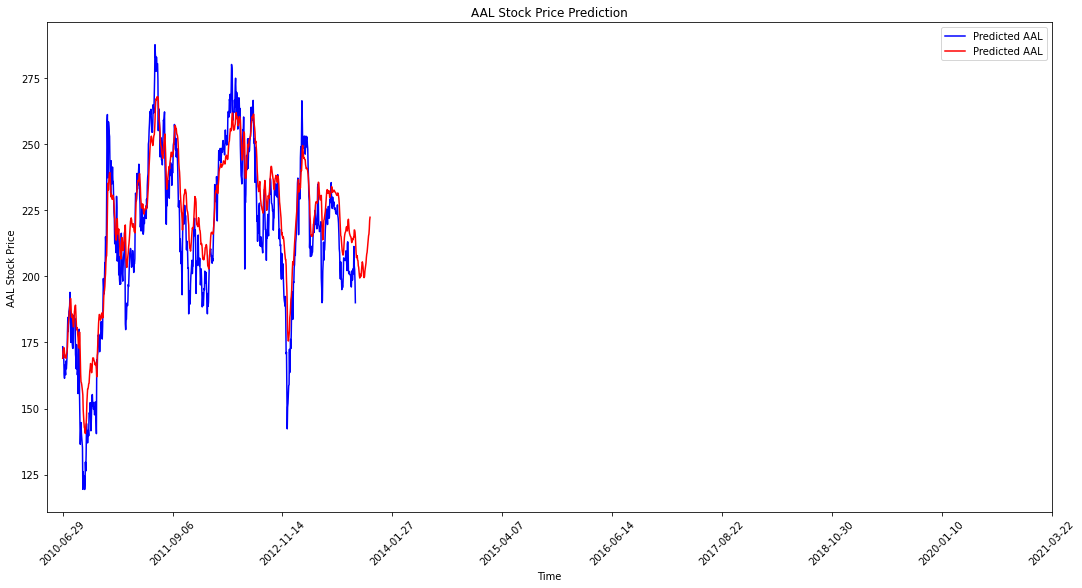

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(TSLAdf.head(800).Date,dataset_test.head(800), color = 'blue', label = 'Predicted AAL')
plt.plot(TSLAdf.head(840).Date,predicted_stock_price, color = 'Red', label = 'Predicted AAL')
plt.xticks(range(0,TSLAdf.shape[0],300),TSLAdf['Date'].loc[::300],rotation=45)
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()